In [1]:
import random

import bamt.preprocessors
import bamt.networks as Nets
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from itertools import product
from pgmpy.estimators import  K2Score
import numpy as np
import seaborn as sns
import importlib
import matplotlib.pyplot as plt

from auxiliary.auxiliary import *

plt.rcParams.update({'font.size': 14})

imagespath = 'C:/Users/Acer/PycharmProjects/BAMTclone/BAMT/experiments2/images'

In [2]:
#importlib.reload(bamt)

In [3]:
n = 2000
np.random.seed(42)
data = pd.DataFrame(data=np.random.beta(0.95, 0.5, size=n)*6-3, columns=['origin1'])
data['origin2'] = np.random.beta(0.4,1, size=n)*2
data['cubed'] = data['origin1']**3/50 + np.random.normal(scale=0.1, size=n)
data['negative_root3'] = -np.sign(data['origin2'])*np.power(np.abs(data['origin2']), 1/3) + np.random.normal(scale=0.1, size=n)
data['hyperbola'] = 1./(data['origin1']+4) + np.random.normal(scale=0.3, size=n)
data['combined'] = data['cubed'] + data['negative_root3']
data['marker'] = 0

mask1 = data['combined']>1.5
mask2 = data['combined']<=-0.7
mask3 = (~mask1) & (~mask2)

data.loc[data[mask1].index, 'marker'] = np.random.choice([0, 1, 2], size=data[mask1].shape[0], p=[0.8, 0.1, 0.1])
data.loc[data[mask2].index, 'marker'] = np.random.choice([0, 1, 2], size=data[mask2].shape[0], p=[0.05, 0.15, 0.8])
data.loc[data[mask3].index, 'marker'] = np.random.choice([0, 1, 2], size=data[mask3].shape[0], p=[0.1, 0.7, 0.2])
data.head(10)

,origin1,origin2,cubed,negative_root3,hyperbola,combined,marker
0,2.119492,0.737207,0.174883,-0.794917,0.118959,-0.620034,1
1,-2.625095,0.031537,-0.477368,-0.337130,0.461323,-0.814498,2
2,-2.894855,0.009888,-0.505449,-0.261298,0.660181,-0.766747,1
3,2.688882,0.292918,0.486818,-0.737814,0.044543,-0.250996,1
4,1.990172,0.243591,0.188168,-0.630120,0.361815,-0.441953,0
5,0.055618,1.007663,0.114813,-1.010407,0.143756,-0.895594,2
6,1.978326,1.391204,0.189030,-1.095673,0.490799,-0.906644,2
7,2.810375,0.138295,0.314106,-0.530062,-0.152493,-0.215957,1
8,1.026379,0.008179,-0.230460,-0.214845,-0.176626,-0.445304,2
9,-0.542534,0.038656,0.011687,-0.415791,0.867133,-0.404104,1


In [4]:
data.dtypes

origin1           float64
origin2           float64
cubed             float64
negative_root3    float64
hyperbola         float64
combined          float64
marker              int64
dtype: object

<AxesSubplot: xlabel='origin1', ylabel='Count'>

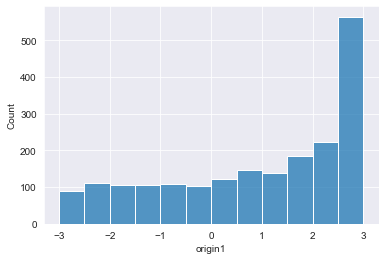

In [5]:
sns.histplot(data['origin1'])

<AxesSubplot: xlabel='origin2', ylabel='Count'>

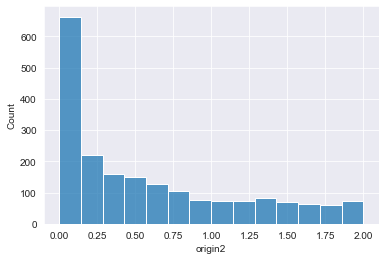

In [6]:
sns.histplot(data['origin2'])

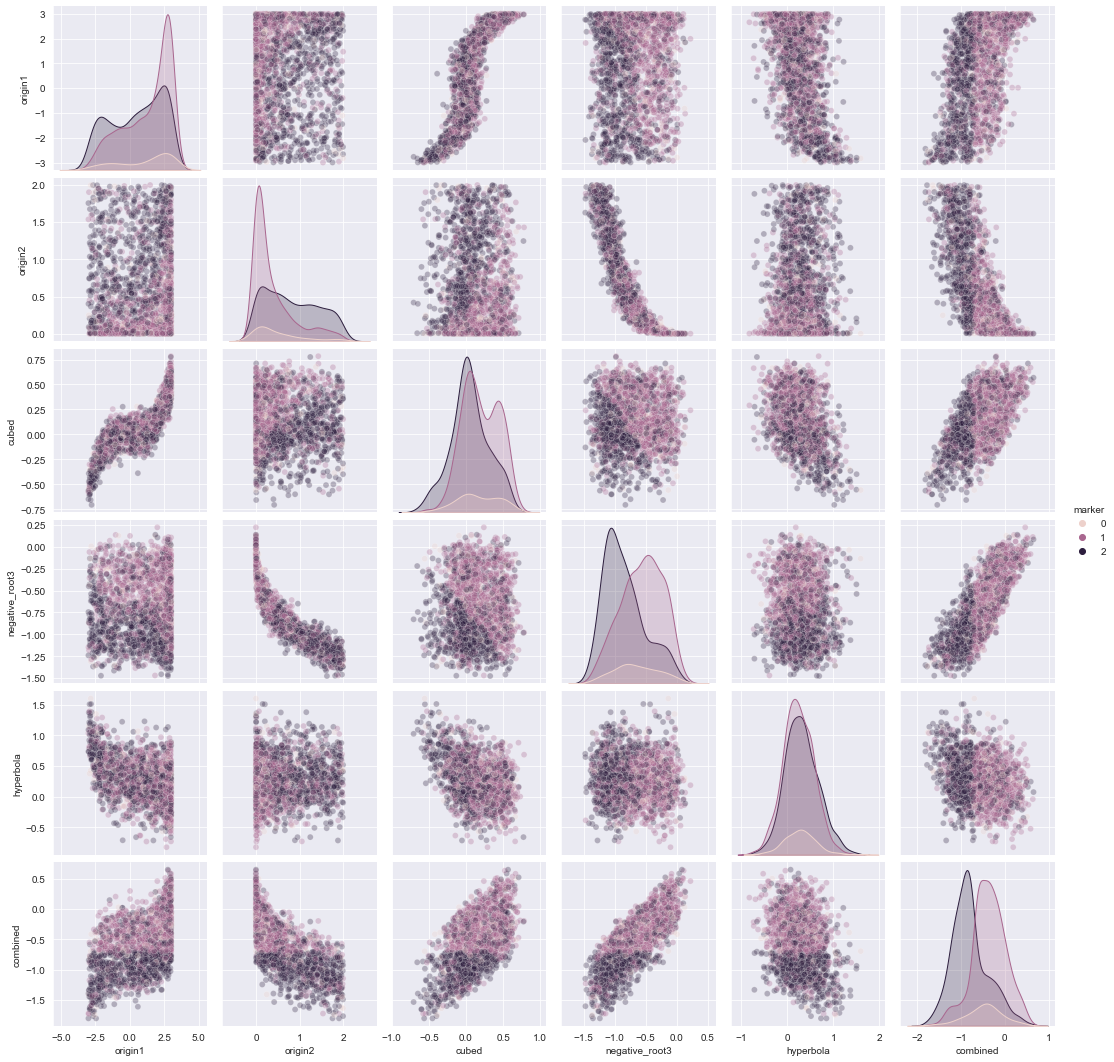

In [7]:
sns.pairplot(data=data, hue='marker', plot_kws={'alpha': 0.3})

In [8]:
#np.random.seed(SEED)
#random.seed(SEED)

qresult = construct_by_quantiles(data, ['marker'])
bn = qresult['bn']

#c=bn.plot2(imagespath , "bn16.html", custom_mapper={'marker': {0: 'Zero', 1: 'One', 2: 'Two'}})
#c=bn.plot2("visualization_results" , "before1.html", custom_mapper={'marker': {0: 'Zero', 1: 'One', 2: 'Two'}})
c=bn.plot2("visualization_results" , "after1.html", custom_mapper={'marker': {0: 'Zero', 1: 'One', 2: 'Two'}})

['origin10', 'origin11', 'origin12', 'origin20', 'origin21', 'origin22', 'cubed0', 'cubed1', 'cubed2', 'negative_root30', 'negative_root31', 'negative_root32', 'hyperbola0', 'hyperbola1', 'hyperbola2', 'combined0', 'combined1', 'combined2', 'marker0', 'marker1', 'marker2']
Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [9]:
#c=bn.plot(output="../visualization_results/"+"defaultbefore1.html")
c=bn.plot(output="../visualization_results/"+"defaultafter1.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [10]:
bn.descriptor

{'types': {'origin10': 'disc',
  'origin11': 'disc',
  'origin12': 'disc',
  'origin20': 'disc',
  'origin21': 'disc',
  'origin22': 'disc',
  'cubed0': 'disc',
  'cubed1': 'disc',
  'cubed2': 'disc',
  'negative_root30': 'disc',
  'negative_root31': 'disc',
  'negative_root32': 'disc',
  'hyperbola0': 'disc',
  'hyperbola1': 'disc',
  'hyperbola2': 'disc',
  'combined0': 'disc',
  'combined1': 'disc',
  'combined2': 'disc',
  'marker0': 'disc',
  'marker1': 'disc',
  'marker2': 'disc'},
 'signs': {}}

In [10]:
qresult['disc_data']

,origin10,origin11,origin12,origin20,origin21,origin22,cubed0,cubed1,cubed2,negative_root30,...,negative_root32,hyperbola0,hyperbola1,hyperbola2,combined0,combined1,combined2,marker0,marker1,marker2
0,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,1,0,0,1,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,1
2,1,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
3,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
1996,0,1,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,1,1,0,0
1997,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1998,0,0,1,0,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0


In [9]:
qresult['disc_data']

,origin10,origin11,origin12,origin20,origin21,origin22,cubed0,cubed1,cubed2,negative_root30,...,negative_root32,hyperbola0,hyperbola1,hyperbola2,combined0,combined1,combined2,marker0,marker1,marker2
0,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,1,0,0,1,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,1
2,1,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
3,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
1996,0,1,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,1,1,0,0
1997,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1998,0,0,1,0,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
qresult['disc_data'].sum()

![](images/bn16.png)

In [ ]:
np.random.seed(SEED)
random.seed(SEED)

uresult = construct_by_uniform(data, ['marker'])
ubn = uresult['bn']

#c=ubn.plot2(imagespath , "ubn16.html", custom_mapper={'marker': {0: 'Zero', 1: 'One', 2: 'Two'}})
#c=ubn.plot2("visualization_results" , "u_before1.html", custom_mapper={'marker': {0: 'Zero', 1: 'One', 2: 'Two'}})
c=ubn.plot2("visualization_results" , "u_after1.html", custom_mapper={'marker': {0: 'Zero', 1: 'One', 2: 'Two'}})

![](images/ubn16.png)

In [ ]:
np.random.seed(SEED)
random.seed(SEED)

kresult = construct_by_kmeans(data, ['marker'])
kbn = kresult['bn']

#c=kbn.plot2(imagespath , "kbn16.html", custom_mapper={'marker': {0: 'Zero', 1: 'One', 2: 'Two'}})
#c=kbn.plot2("visualization_results" , "k_before1.html", custom_mapper={'marker': {0: 'Zero', 1: 'One', 2: 'Two'}})
c=kbn.plot2("visualization_results" , "k_after1.html", custom_mapper={'marker': {0: 'Zero', 1: 'One', 2: 'Two'}})

![](images/kbn16.png)

In [ ]:
c=bn.plot_for_specific_nodes(['marker0', 'marker1', 'marker2'], imagespath , "subbn16.html", custom_mapper={'marker': {0: 'Zero', 1: 'One', 2: 'Two'}})

In [ ]:
c=ubn.plot_for_specific_nodes(['marker0', 'marker1', 'marker2'], imagespath , "sububn16.html", custom_mapper={'marker': {0: 'Zero', 1: 'One', 2: 'Two'}})

In [ ]:
c=kbn.plot_for_specific_nodes(['marker0', 'marker1', 'marker2'], imagespath , "subkbn16.html", custom_mapper={'marker': {0: 'Zero', 1: 'One', 2: 'Two'}})

In [ ]:
kencoder, data_kdiscretized_enc = kresult['encoder'], kresult['disc_data']

In [ ]:
print_histogram('origin1', data, data_kdiscretized_enc, kencoder)

In [ ]:
print_histogram('hyperbola', data, data_kdiscretized_enc, kencoder)

In [ ]:
print_histogram('negative_root3', data, data_kdiscretized_enc, kencoder)

In [ ]:
print_histogram('cubed', data, data_kdiscretized_enc, kencoder)

In [ ]:
c=kbn.plot_for_specific_nodes(['marker0', 'marker1', 'marker2'], imagespath , "subkbn16.html", custom_mapper={'marker': {0: 'Zero', 1: 'One', 2: 'Two'}})

In [ ]:
relationships = [['origin1', 'cubed', 1],
                 ['origin2', 'negative_root3', -1],
                 ['origin1', 'hyperbola', -1],
                 ['origin1', 'combined', 1],
                 ['origin2', 'combined', -1],
                 ['negative_root3', 'combined', 1]]

true_edges = list()
states=[0,1,2]
for rel in relationships:
    true_edges+=([[rel[0]+str(i), rel[1]+str(j)] for i, j in zip(states, states[::rel[2]])])
true_edges

In [ ]:
calculate_ratio(bn.edges, true_edges)

In [ ]:
calculate_ratio(ubn.edges, true_edges)

In [ ]:
calculate_ratio(kbn.edges, true_edges)

In [ ]:
all_edges = list(set(["-".join(e) for e in bn.edges + ubn.edges + kbn.edges])) #white list for the next bn

In [ ]:
tradeoffbn = Nets.DiscreteBN()
nodes = list(dict.fromkeys(sum([x.split("-") for x in all_edges], start=[])))
tradeoffbn.add_nodes(dict(types={cat: 'disc' for _, cat in enumerate(nodes)}))

params = {'white_list': [(x[0], x[1]) for x in [y.split("-") for y in all_edges]]}

tradeoffbn.add_edges(data_kdiscretized_enc.astype("int32"), scoring_function=("K2",K2Score), params=params)

c=tradeoffbn.plot2(imagespath, "tbn16.html", custom_mapper={'marker': {0: 'Zero', 1: 'One', 2: 'Two'}})

![](images/tbn16.png)

In [ ]:
calculate_ratio(tradeoffbn.edges, true_edges)

In [ ]:
c=tradeoffbn.plot_for_specific_nodes(['marker0', 'marker1', 'marker2'], imagespath , "subtbn16.html", custom_mapper={'marker': {0: 'Zero', 1: 'One', 2: 'Two'}})

In [ ]:
np.random.seed(42)

forced_edge = ['origin11', 'combined1']
source_num = 0
n_trials, counter = 5, 0
state_index = data_kdiscretized_enc[data_kdiscretized_enc[forced_edge[0]]==1].index
m = state_index.shape[0]
mean, std = data.loc[state_index, forced_edge[0][:-1]].mean(), data.loc[state_index, forced_edge[0][:-1]].std()

for _ in range(n_trials):
    data_kdisc = data.copy(deep=True)
    data_kdisc.loc[state_index, forced_edge[0][:-1]] = np.random.normal(mean, std, size=m)

    kbn1 = construct_by_quantiles(data_kdisc, ['marker'])['bn']

    if forced_edge in kbn1.edges:
        counter+=1

    del kbn1
    del data_kdisc
counter/n_trials

In [ ]:
np.random.seed(42)

for edge in true_edges:
    forced_edge = edge
    source_num = 0
    n_trials, counter = 20, 0
    state_index = uresult['disc_data'][uresult['disc_data'][forced_edge[0]]==1].index
    m = state_index.shape[0]
    mean, std = data.loc[state_index, forced_edge[0][:-1]].mean(), data.loc[state_index, forced_edge[0][:-1]].std()

    for s in range(n_trials):
        data_kdisc = data.copy(deep=True)
        data_kdisc.loc[state_index, forced_edge[0][:-1]] = np.random.normal(mean, std, size=m)

        kbn1 = construct_by_uniform(data_kdisc, ['marker'])['bn']

        if forced_edge in kbn1.edges:
            counter+=1
        del kbn1
        del data_kdisc
    print(f'After noising of true edge{edge}`s source node the edge occured in {counter/n_trials*100}% of cases ')

In [ ]:
std

In [ ]:
data.columns.difference([])